#### Recurrent Neural Network (RNN)<br>
Used in sequence data such as:
* Time Series<br>
* Sentenses <br>
* Audio<br>
* Car Trajectories<br>
* Music

#### Vanishing Gradients<br>

The vanishing gradient problem occurs in deep neural networks during the training process. It refers to the phenomenon where the gradients calculated during backpropagation become extremely small as they propagate backward through many layers of the network. As a result, the weights in the early layers receive very small updates, leading to slow or stalled learning in those layers.

#### LSTM <br>

By utilizing these gating mechanisms, LSTMs can effectively propagate gradients over long sequences by learning when to retain or forget information. This helps address the vanishing gradient problem and enables LSTMs to capture long-term dependencies in the input data.<br>

It's important to note that while LSTMs mitigate the vanishing gradient problem to some extent, they may not completely eliminate it in all cases. Other factors, such as the depth and complexity of the network, the choice of activation functions, and the specific characteristics of the training data, can still impact gradient flow. However, LSTMs are generally considered more resilient to the vanishing gradient problem compared to traditional RNN architectures.

#### Simple sine wave with RNN<br>

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
style.use('ggplot')
plt.rcParams['figure.figsize'] = (11, 6)
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

In [15]:
y = np.sin(x)

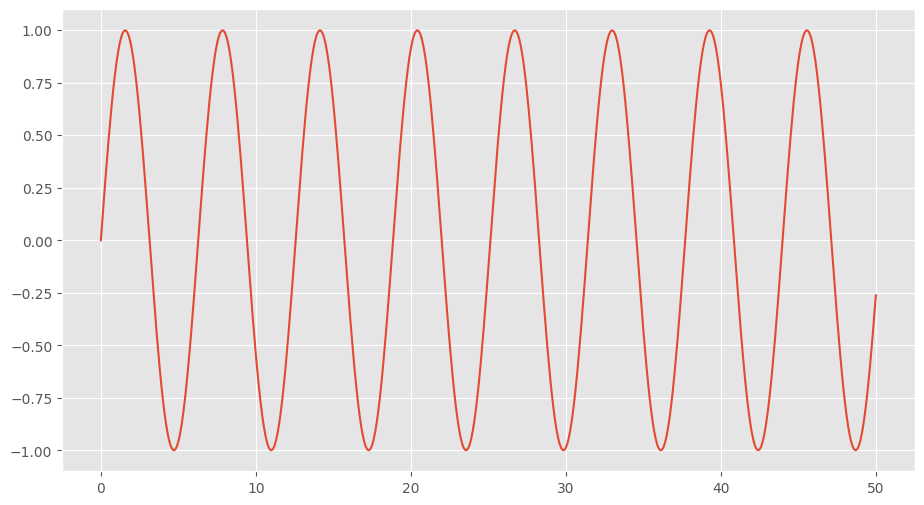

In [16]:
plt.plot(x,y);

* craete a dataframe

In [17]:
df = pd.DataFrame(data=y, index=x, columns=['sine'])                 

In [18]:
df.head()

,sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418


In [19]:
len(df)

501

#### make a non-random train-test split

In [20]:
test_percent = 0.1

In [21]:
len(df)*test_percent

50.1

In [22]:
test_point = round(len(df)*test_percent)

In [23]:
test_point

50

In [24]:
test_ind = int(len(df)-test_point)

In [25]:
test_ind

451

In [26]:
train = df.iloc[:test_ind]

In [27]:
test = df.iloc[test_ind:]

In [28]:
train

,sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
44.6,0.579164
44.7,0.657656
44.8,0.729577
44.9,0.794208


In [29]:
test

,sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


#### Scale data

In [31]:
scaler = MinMaxScaler()

In [32]:
scaler.fit(train)

MinMaxScaler()

In [33]:
scaled_train = scaler.transform(train)

In [34]:
scaled_test = scaler.transform(test)

#### Generate a batch for the sine wave data using TimeseriesGenerator<br>
It generates batches of temporal data for time series forecasting or sequence prediction tasks. It takes input sequences and corresponding target sequences and generates batches of samples.

In [43]:
length = 25
batch_size = 1

generator = TimeseriesGenerator(scaled_train, scaled_train,
                                length=length, batch_size=batch_size)

In [44]:
len(scaled_train)

451

In [45]:
len(generator)

426

In [47]:
#inspect the elements at index 0
X,y = generator[0]

In [51]:
print("X values:\n",X, "\n\n predicted y:\n", y)

X values:
 [[[0.49999912]
  [0.54991622]
  [0.59933458]
  [0.64776041]
  [0.69470985]
  [0.73971381]
  [0.78232262]
  [0.82211054]
  [0.85868004]
  [0.89166571]
  [0.92073798]
  [0.94560637]
  [0.9660224 ]
  [0.98178208]
  [0.99272794]
  [0.99875061]
  [0.99978993]
  [0.9958355 ]
  [0.98692684]
  [0.97315296]
  [0.95465148]
  [0.93160726]
  [0.90425056]
  [0.87285471]
  [0.83773342]]] 

 predicted y:
 [[0.79923759]]


#### Modeling

In [53]:
length = 50
batch_size = 1

generator = TimeseriesGenerator(scaled_train, scaled_train,
                                length=length, batch_size=batch_size)

In [57]:
#number of features to be trained on
n_features = 1

#### Simple RNN

In [58]:
model = Sequential()
model.add(SimpleRNN(50,input_shape=(length, n_features)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.fit(generator, epochs=5)

Epoch 1/5
401/401 [==============================] - 1s 3ms/step - loss: 6.8853e-04
Epoch 2/5
401/401 [==============================] - 1s 3ms/step - loss: 1.9172e-05
Epoch 3/5
401/401 [==============================] - 1s 3ms/step - loss: 2.1517e-05
Epoch 4/5
401/401 [==============================] - 1s 3ms/step - loss: 2.9690e-04
Epoch 5/5
401/401 [==============================] - 1s 3ms/step - loss: 1.9270e-05


#### Model Evaluation

In [63]:
losses = pd.DataFrame(model.history.history)

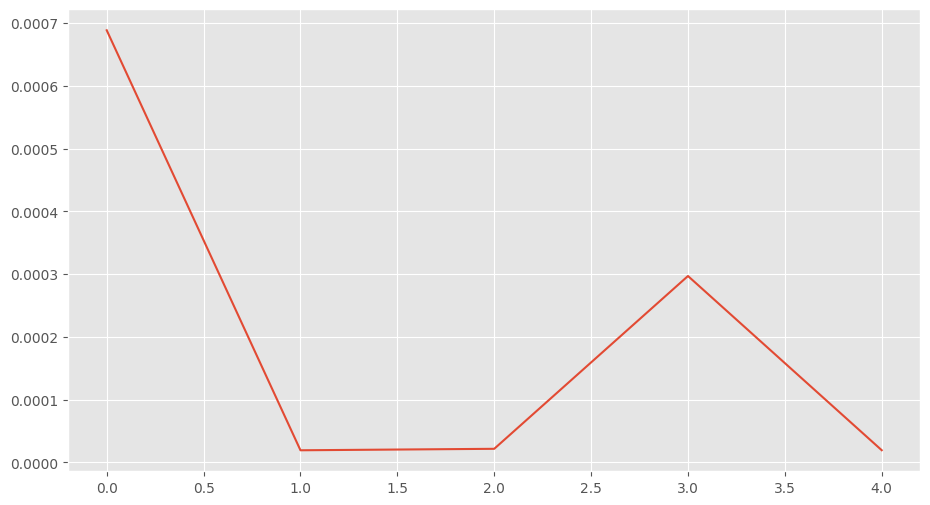

In [65]:
plt.plot(losses);

In [67]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1,length,n_features)

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)

1/1 [==============================] - 0s 15ms/step


In [68]:
test_predictions

[array([0.953969], dtype=float32),
 array([0.9733404], dtype=float32),
 array([0.9913422], dtype=float32),
 array([1.0025641], dtype=float32),
 array([1.0104332], dtype=float32),
 array([1.0121942], dtype=float32),
 array([1.009588], dtype=float32),
 array([1.0017151], dtype=float32),
 array([0.98922724], dtype=float32),
 array([0.9723408], dtype=float32),
 array([0.95138854], dtype=float32),
 array([0.9264896], dtype=float32),
 array([0.89739287], dtype=float32),
 array([0.8658198], dtype=float32),
 array([0.8310088], dtype=float32),
 array([0.7934578], dtype=float32),
 array([0.75338453], dtype=float32),
 array([0.71185285], dtype=float32),
 array([0.6686012], dtype=float32),
 array([0.6238678], dtype=float32),
 array([0.5783772], dtype=float32),
 array([0.5322261], dtype=float32),
 array([0.48593193], dtype=float32),
 array([0.4395112], dtype=float32),
 array([0.39448053], dtype=float32),
 array([0.34931937], dtype=float32),
 array([0.30642557], dtype=float32),
 array([0.26496044], 

In [69]:
scaled_test

array([[9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],
       [7.50127132e-01],
       [7.05655314e-01],
       [6.59128649e-01],
       [6.11012013e-01],
       [5.61786173e-01],
       [5.11942978e-01],
       [4.61980443e-01],
       [4.12397778e-01],
       [3.63690397e-01],
       [3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],


In [71]:
true_predictions = scaler.inverse_transform(test_predictions)

In [72]:
true_predictions

array([[ 0.90793249],
       [ 0.94667495],
       [ 0.98267826],
       [ 1.00512185],
       [ 1.02085997],
       [ 1.02438186],
       [ 1.0191696 ],
       [ 1.00342384],
       [ 0.97844839],
       [ 0.94467583],
       [ 0.9027716 ],
       [ 0.85297411],
       [ 0.79478113],
       [ 0.73163552],
       [ 0.66201404],
       [ 0.58691267],
       [ 0.50676676],
       [ 0.42370406],
       [ 0.33720149],
       [ 0.2477354 ],
       [ 0.15675488],
       [ 0.06445342],
       [-0.02813414],
       [-0.12097484],
       [-0.21103549],
       [-0.30135708],
       [-0.38714398],
       [-0.47007358],
       [-0.54726613],
       [-0.62010219],
       [-0.68610075],
       [-0.74485222],
       [-0.79600346],
       [-0.83903717],
       [-0.87327676],
       [-0.89846934],
       [-0.91483043],
       [-0.92213499],
       [-0.91985118],
       [-0.90970959],
       [-0.89053031],
       [-0.86336193],
       [-0.82776386],
       [-0.78581812],
       [-0.73583116],
       [-0

In [76]:
#create a dataframe of the true test and preds
test['predictions'] = true_predictions

In [77]:
test

,sine,predictions
45.1,0.899097,0.907932
45.2,0.938307,0.946675
45.3,0.968142,0.982678
45.4,0.988304,1.005122
45.5,0.998591,1.020860
45.6,0.998900,1.024382
45.7,0.989229,1.019170
45.8,0.969673,1.003424
45.9,0.940429,0.978448
46.0,0.901788,0.944676


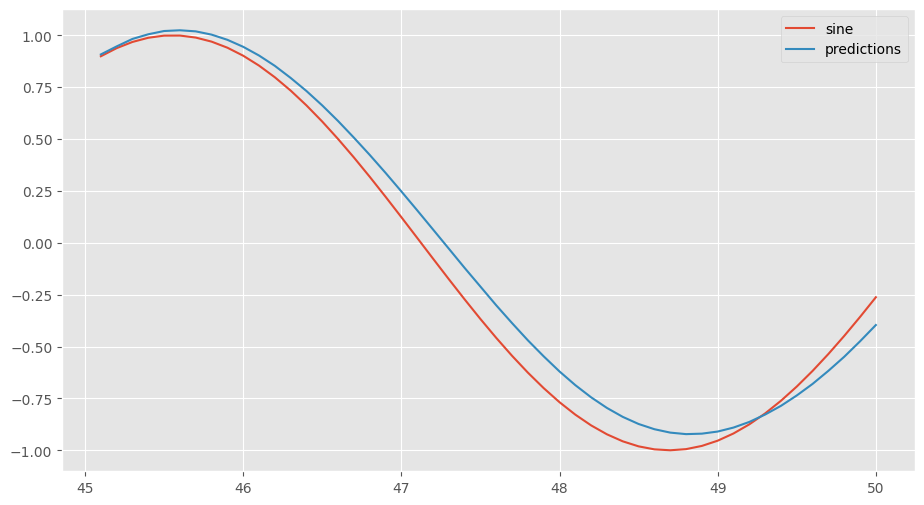

In [79]:
test.plot();

#### RNN with LSTMS and Forecasting

In [81]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [87]:
length = 49
generator = TimeseriesGenerator(scaled_train, scaled_train,
                                length=length, batch_size=1)
validation_generator = TimeseriesGenerator(scaled_test, scaled_test,
                                          length=length,
                                          batch_size=1)

In [88]:
model = Sequential()
model.add(LSTM(50,input_shape=(length, n_features)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [89]:
model.fit_generator(generator,epochs=20,
                    validation_data=validation_generator, 
                    callbacks=[early_stop])

Epoch 1/20
402/402 [==============================] - 4s 8ms/step - loss: 0.0171 - val_loss: 2.6013e-05
Epoch 2/20
402/402 [==============================] - 3s 7ms/step - loss: 1.8592e-04 - val_loss: 8.6810e-06
Epoch 3/20
402/402 [==============================] - 3s 8ms/step - loss: 2.1588e-04 - val_loss: 1.9737e-05
Epoch 4/20
402/402 [==============================] - 3s 7ms/step - loss: 9.4518e-05 - val_loss: 4.5001e-05


In [90]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1,length,n_features)

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)

1/1 [==============================] - 0s 15ms/step


In [91]:
true_predictions = scaler.inverse_transform(test_predictions)

In [94]:
test['LSTM predictions'] = true_predictions

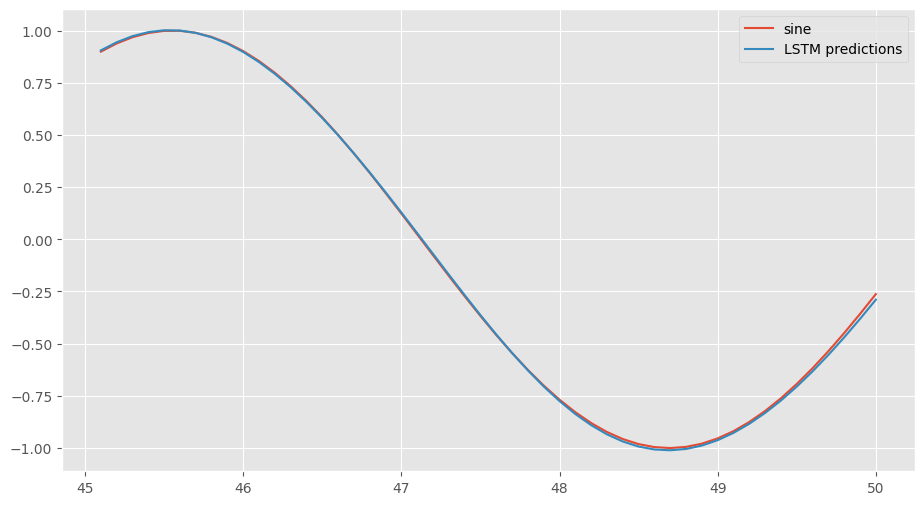

In [98]:
test.plot();

#### Forecast beyond 50

In [99]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [100]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data,
                                length=length, batch_size=1)

In [101]:
model = Sequential()
model.add(LSTM(50,input_shape=(length, n_features)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [102]:
model.fit_generator(generator,epochs=20,
                    validation_data=validation_generator, 
                    callbacks=[early_stop])

Epoch 1/20
452/452 [==============================] - 5s 8ms/step - loss: 0.0107 - val_loss: 1.4462e-04
Epoch 2/20
452/452 [==============================] - 3s 7ms/step - loss: 7.8263e-05 - val_loss: 1.2728e-07
Epoch 3/20
452/452 [==============================] - 4s 8ms/step - loss: 8.3582e-05 - val_loss: 4.5550e-05
Epoch 4/20
452/452 [==============================] - 3s 7ms/step - loss: 5.5694e-05 - val_loss: 9.3698e-09
Epoch 5/20
452/452 [==============================] - 3s 7ms/step - loss: 1.6532e-04 - val_loss: 2.7894e-04
Epoch 6/20
452/452 [==============================] - 3s 7ms/step - loss: 1.9205e-04 - val_loss: 2.0464e-06


#### predictions

In [103]:
forecast = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1,length,n_features)

for i in range(25):
    current_pred = model.predict(current_batch)[0]
    
    forecast.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]], axis=1)

1/1 [==============================] - 0s 15ms/step


In [104]:
#get unscaled data
forecast = scaler.inverse_transform(forecast)

In [105]:
forecast_index = np.arange(50.1,52.6,step=0.1)

In [106]:
len(forecast_index)

25

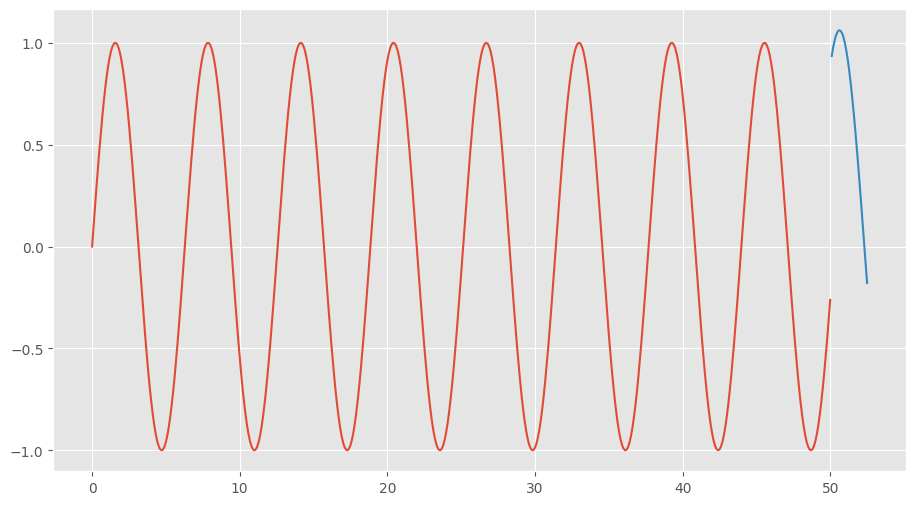

In [108]:
plt.plot(df.index,df['sine'])
plt.plot(forecast_index, forecast)